混淆矩阵：
 [[766  38]
 [ 34 122]]

TPR: 0.9575 
FPR: 0.2375 
Precision: 0.9527363184079602 
Recall: 0.9575 
F1_score: 0.9551122194513716 
Accuracy: 0.925


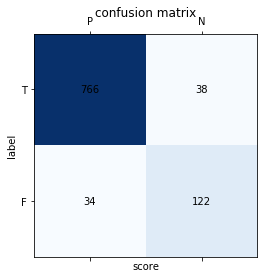

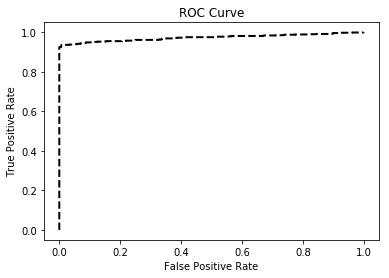

AUC: 0.972921875


In [1]:
from numpy import loadtxt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 读取数据
score_csv_filename="score.csv"
label_csv_filename="label.csv"
with open(score_csv_filename,'rt',encoding='UTF-8')as raw_data:
  score_data=loadtxt(raw_data,delimiter=',')
with open(label_csv_filename,'rt',encoding='UTF-8')as raw_data:
  label_data=loadtxt(raw_data,delimiter=',')

# print(score_data)
# print(label_data)

#条件设置 数据分类
threshold = 0.05
pred = score_data > threshold
label_p = label_data == 1

#生成混淆矩阵
my_confusion_matrix = confusion_matrix(label_p,pred,labels = [1,0]).T
print("混淆矩阵：\n",my_confusion_matrix)

#绘制混淆矩阵
plt.matshow(my_confusion_matrix, cmap=plt.cm.Blues) 
for i in range(len(my_confusion_matrix)):
    for j in range(len(my_confusion_matrix)):
        plt.annotate(my_confusion_matrix[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('score')
plt.xticks(range(0,2),labels=['P','N'])
plt.yticks(range(0,2),labels=['T','F'])
plt.show

tp,fp,fn,tn = my_confusion_matrix.ravel()
# print(tp,tn,fp,fn)
#计算
Precision = tp/(tp +fp)
Recall = tp/(tp+fn)
F1_score =2*(Precision*Recall)/(Precision+Recall)
Accuracy=(tp+tn)/(tp+fp+fn+tn)
TPR = Recall
FPR = fp/(fp+tn)
print("\nTPR:",TPR,"\nFPR:",FPR,"\nPrecision:",Precision,"\nRecall:",Recall,"\nF1_score:",F1_score,"\nAccuracy:",Accuracy)

#绘制ROC曲线
plt.figure()
fpr, tpr, thersholds = roc_curve(label_data,score_data)
plt.plot(fpr, tpr, 'k--',lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 计算AUC
roc_auc = auc(fpr, tpr)
print("AUC:",roc_auc)
